##  Loan Eligibility:

Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financiral loan servieces is to decrease payment defaults and ensure that individuals are paying back their loans as expected.

In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

### About Dataset:
Data contains features of 2,55,347 loan applicants which are used to predict whether loan will be approved or not.

##### Features:
1. Loan ID
2. Applicant's age
3. Applicant's Income
4. Loan Amount
5. Month's Employed
6. Number of credit line
7. Interest rate
8. Education
9. Loan Terms
10. Debt to income ratio
11. Employment type
12. Marital Status
13. Have mortgage
14. Have Dependent
15. purpose for Loan.
16. Has Co-signer

The risk_flag indicates whether there has been a default in the past or not. The risk_flag is the target variable.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Importing Dataset

In [3]:
df = pd.read_csv('../Dataset/Loan_default.csv')
print(f"Dataset has {df.shape[0]} rows/data points and {df.shape[1]} columns/features: ")
df.head() 

Dataset has 255347 rows/data points and 18 columns/features: 


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


Number of unique elements

In [4]:
print("Number of unique elements in each column:\n")
df.nunique()

Number of unique elements in each column:



LoanID            255347
Age                   52
Income            114620
LoanAmount        158729
CreditScore          550
MonthsEmployed       120
NumCreditLines         4
InterestRate        2301
LoanTerm               5
DTIRatio              81
Education              4
EmploymentType         4
MaritalStatus          3
HasMortgage            2
HasDependents          2
LoanPurpose            5
HasCoSigner            2
Default                2
dtype: int64

Checking for missing values

In [5]:
print("Number of missing values in each column:")
print(df.isnull().sum(),'\n')

print("Total number of Missing values: ", df.isnull().sum().sum())

Number of missing values in each column:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64 

Total number of Missing values:  0


Check for duplicate values

In [6]:
print("Number of Duplicate values in each column:",df.duplicated().sum())

Number of Duplicate values in each column: 0


Defining numerical & categorical columns

In [7]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default']

We have 8 categorical features : ['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']


Categories in each Categorical variable:

In [8]:
print("Categories in 'Education' variable:     ",end=" " )
print(df['Education'].unique())

print("Categories in 'EmploymentType' variable:  ",end=" ")
print(df['EmploymentType'].unique())

print("Categories in 'Marital Status' variable:",end=" " )
print(df['MaritalStatus'].unique())

print("Categories in 'Loan purpose' variable:     ",end=" " )
print(df['LoanPurpose'].unique())

Categories in 'Education' variable:      ["Bachelor's" "Master's" 'High School' 'PhD']
Categories in 'EmploymentType' variable:   ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
Categories in 'Marital Status' variable: ['Divorced' 'Married' 'Single']
Categories in 'Loan purpose' variable:      ['Other' 'Auto' 'Business' 'Home' 'Education']


#### Data Summary:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [10]:
# show the statistical summary
df.describe().style.format(precision=2).background_gradient(cmap="RdPu")

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00
mean,43.50,82499.30,127578.87,574.26,59.54,2.50,13.49,36.03,0.50,0.12
std,14.99,38963.01,70840.71,158.90,34.64,1.12,6.64,16.97,0.23,0.32
min,18.00,15000.00,5000.00,300.00,0.00,1.00,2.00,12.00,0.10,0.00
25%,31.00,48825.50,66156.00,437.00,30.00,2.00,7.77,24.00,0.30,0.00
50%,43.00,82466.00,127556.00,574.00,60.00,2.00,13.46,36.00,0.50,0.00
75%,56.00,116219.00,188985.00,712.00,90.00,3.00,19.25,48.00,0.70,0.00
max,69.00,149999.00,249999.00,849.00,119.00,4.00,25.00,60.00,0.90,1.00


Correlation Matrix:

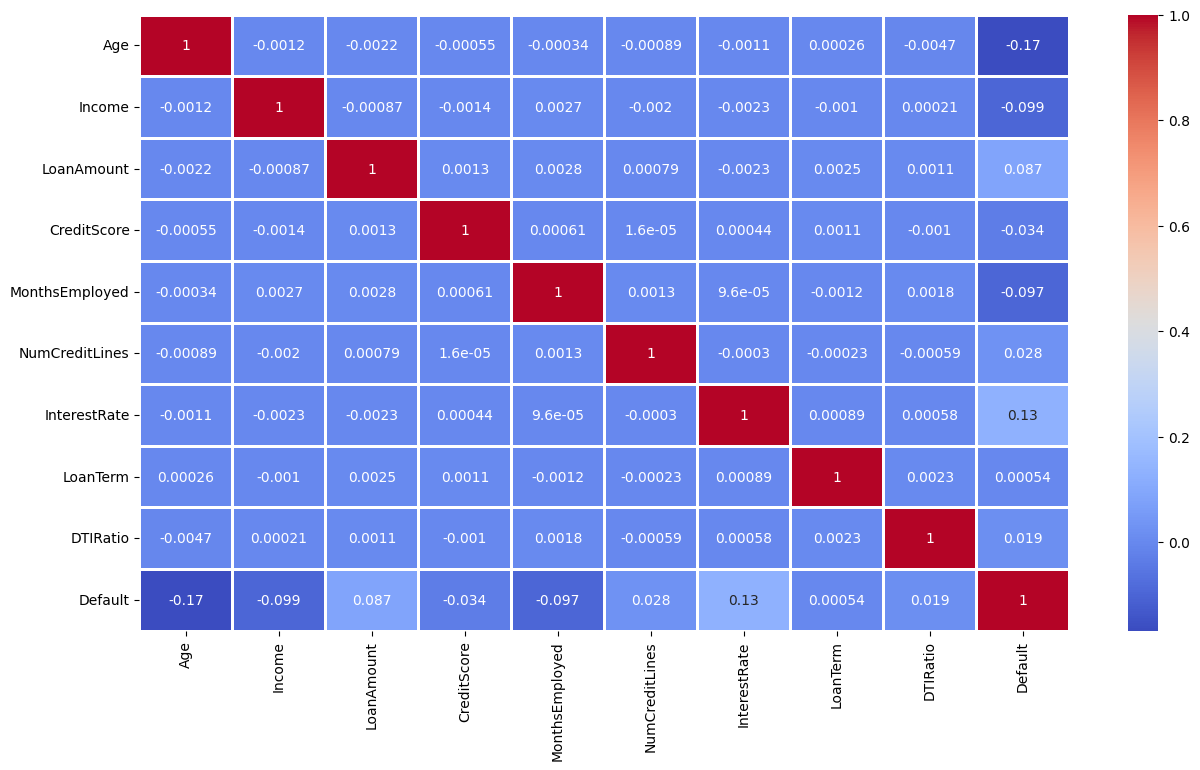

In [11]:
Corr = df.corr(numeric_only=True)
plt.figure(figsize=(15,8))
sns.heatmap(Corr, annot=True, cmap='coolwarm', square=False, linewidths=0.8)
plt.show()

### Exploring Dataset:

In [12]:
df.sample(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
192080,5E33P3GQZB,34,122558,166556,741,3,1,20.26,36,0.14,Master's,Self-employed,Married,No,No,Education,No,0
173356,ZEMF2SI7A3,55,68960,17196,374,75,3,3.12,36,0.86,Bachelor's,Self-employed,Divorced,No,No,Education,No,0
248384,IUPUKQ6F7H,38,55902,18742,384,52,2,4.09,36,0.75,High School,Full-time,Single,Yes,Yes,Business,No,0
34260,ZU6D6B69GS,44,73803,175963,312,5,2,17.84,60,0.51,High School,Unemployed,Divorced,No,Yes,Business,No,0
15195,AI1YLO75UJ,65,131675,68841,550,19,4,17.04,12,0.86,Bachelor's,Unemployed,Single,Yes,Yes,Home,Yes,0


Distribution of Education Status of Loan applicants

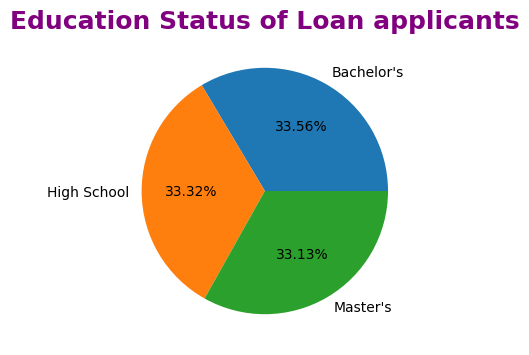

In [13]:
# All different countries and their order count
Education_status = df.Education.value_counts()

# Only top 3 countries
plt.figure(figsize=(6,4))
plt.pie(Education_status.values[:3],labels =Education_status.index[:3],autopct = "%1.2f%%")

plt.title('Education Status of Loan applicants',fontsize=18,color='purple',fontweight=900)
plt.show()

Distribution of Maritial Status of Loan applicants

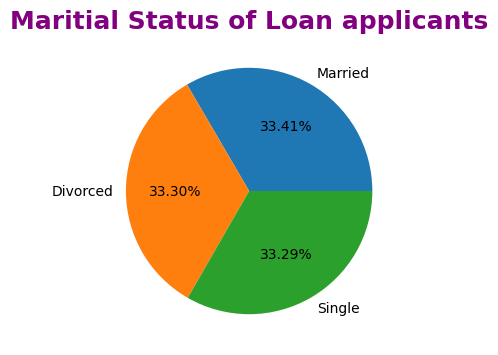

In [14]:
# All different countries and their order count
Maritial_status = df.MaritalStatus.value_counts()

# Only top 3 countries
plt.figure(figsize=(6,4))
plt.pie(Maritial_status.values[:3],labels =Maritial_status.index[:3],autopct = "%1.2f%%")

plt.title('Maritial Status of Loan applicants',fontsize=18,color='purple',fontweight=900)
plt.show()

Various Purpose for applying for Loan:

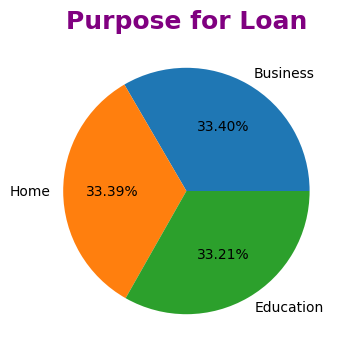

In [15]:
# All different countries and their order count
Loan_purpose = df.LoanPurpose.value_counts()

# Only top 3 countries
plt.figure(figsize=(6,4))
plt.pie(Loan_purpose.values[:3],labels =Loan_purpose.index[:3],autopct = "%1.2f%%")

plt.title('Purpose for Loan',fontsize=18,color='purple',fontweight=900)
plt.show()

In [16]:
# Top Customers:
df.groupby('NumCreditLines').size()

NumCreditLines
1    63554
2    64130
3    63834
4    63829
dtype: int64

Q) Does Income affect default rate?

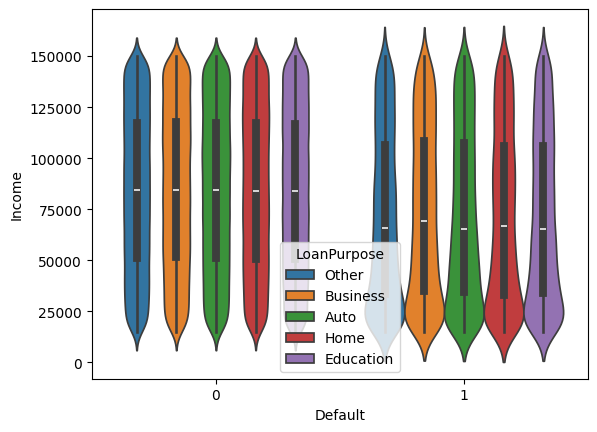

In [17]:
sns.violinplot(x='Default', y='Income', hue='LoanPurpose', data=df)
plt.show()

Purpose of Loan's effect on default rate

In [18]:
# Grouping Default rate by Co-signer:
pivot = df.pivot_table(index='LoanPurpose', columns='Default', aggfunc='size')
pivot['Rate'] = (pivot[1]/(pivot[0]+pivot[1]))*100
pivot

Default,0,1,Rate
LoanPurpose,,,
Auto,44803,6041,11.881441
Business,44975,6323,12.326017
Education,44967,6038,11.838055
Home,46037,5249,10.234762
Other,44912,6002,11.788506


Effect of Having a co-signer on default rate

In [19]:
# Grouping Default rate by Co-signer:
pivot = df.pivot_table(index='HasCoSigner', columns='Default', aggfunc='size')
pivot['Rate'] = (pivot[1]/(pivot[0]+pivot[1]))*100
pivot

Default,0,1,Rate
HasCoSigner,,,
No,111223,16423,12.866051
Yes,114471,13230,10.360138


Effect of Employment type on default rate

In [20]:
# Grouping Default rate by Maritial status:
pivot = df.pivot_table(index='EmploymentType', columns='Default', aggfunc='size')
pivot['Rate'] = (pivot[1]/(pivot[0]+pivot[1]))*100
pivot

Default,0,1,Rate
EmploymentType,,,
Full-time,57632,6024,9.463366
Part-time,56484,7677,11.965213
Self-employed,56404,7302,11.462029
Unemployed,55174,8650,13.552895


Effect of having a Mortgage on default rate

In [21]:
# Grouping Default rate by Mortgage status:
pivot = df.pivot_table(index='HasMortgage', columns='Default', aggfunc='size')
pivot['Rate'] = (pivot[1]/(pivot[0]+pivot[1]))*100
pivot

Default,0,1,Rate
HasMortgage,,,
No,111909,15761,12.345108
Yes,113785,13892,10.880581


Effect of being married on default rate

In [22]:
# Grouping Default rate by Maritial status:
pivot = df.pivot_table(index='MaritalStatus', columns='Default', aggfunc='size')
pivot['Rate'] = (pivot[1]/(pivot[0]+pivot[1]))*100
pivot

Default,0,1,Rate
MaritalStatus,,,
Divorced,74376,10657,12.532781
Married,76433,8869,10.397177
Single,74885,10127,11.912436


Distribution of Credit Score

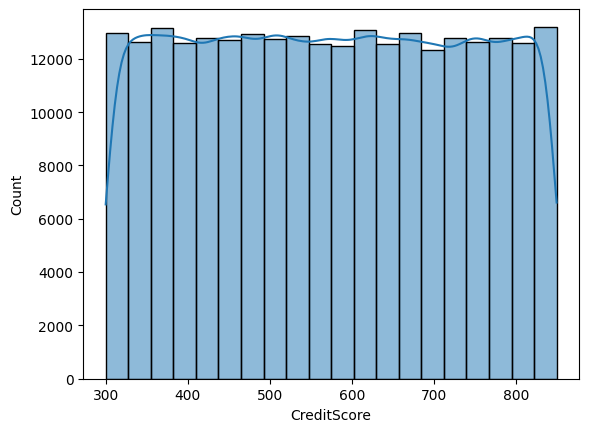

In [23]:
## Distribution of Numerical variable:
sns.histplot(df['CreditScore'], bins=20, kde=True)
plt.show()

Distribution of Applicant's Age:

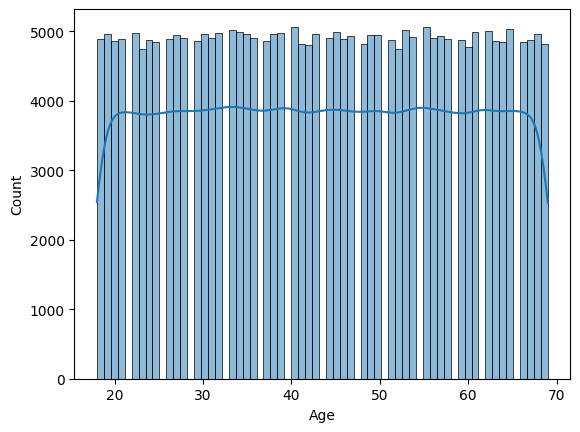

In [24]:
## Distribution of Age:
sns.histplot(df['Age'] ,kde=True)
plt.show()

Distribution of Employment Time period:

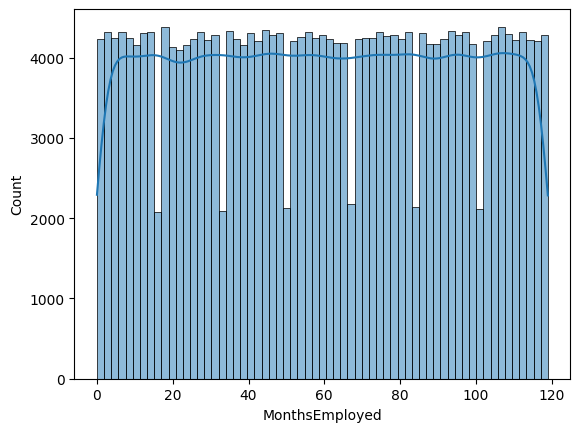

In [25]:
## Distribution of Numerical variable:
sns.histplot(df['MonthsEmployed'] ,kde=True)
plt.show()

Relation b/w Credit score and Debt-to-income ratio

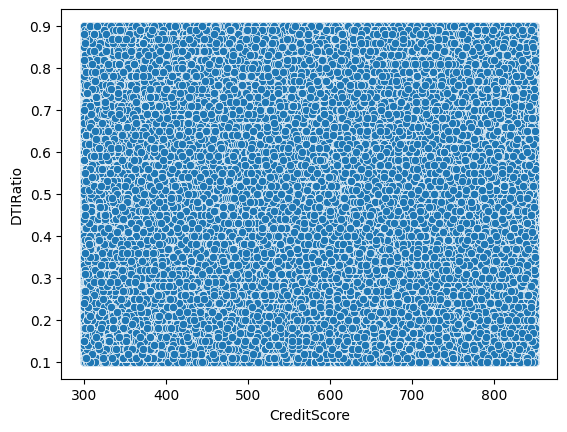

In [26]:
## Relation b/w Credit Score and DTIRatio
sns.scatterplot(x='CreditScore', y='DTIRatio', data=df)
plt.show()

Q) Does Having higher interest rate Change terms of loan?

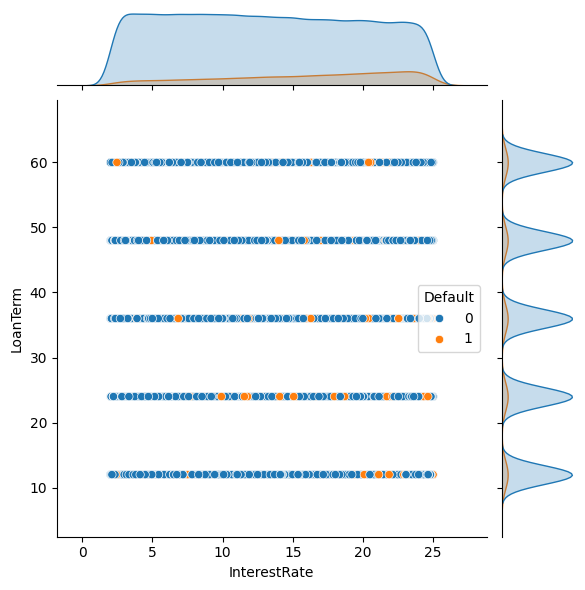

In [27]:
sns.jointplot(x='InterestRate', y='LoanTerm', data=df, hue='Default', kind='scatter')
plt.show()

In [28]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

In [29]:
from plotly import express as px

# Create a grouped DataFrame to count occurrences
df_sunburst = df.groupby(['MaritalStatus', 'Education']).size().reset_index(name='count')

# Create the sunburst chart
fig = px.sunburst(
   df_sunburst,  # Use the grouped DataFrame
   path=['MaritalStatus', 'Education'],  # Define the hierarchy
   values='count',  # Use the computed count column
   color='count',   # Color the sectors based on the count
   color_discrete_map={  # Custom discrete colors for Marital Status
      'Single': 'darkblue',  
      'Divorced': 'darkred',  
      'Married': 'gold'
   }
)

# Set the title and layout of the chart
title = 'Breakdown of Marital Status (Married/Single) and Education Level'
fig.update_layout(
   title=title,                         
   paper_bgcolor='#F5F5F5',  # Light gray background
   plot_bgcolor='#F5F5F5',   # Light gray plot background       
   font=dict(family='Comic Sans MS', size=20, color='tomato'),
   margin=dict(l=10, r=10, t=50, b=10),  # Reduce left, right, top, and bottom margins
   autosize=True,  # Allow dynamic resizing
   width=1000,  # Set width to increase plot size
   height=500   # Set height for better visibility
)

# Update circle size and text size
fig.update_traces(
   marker=dict(line=dict(color='black', width=2)),  
   textfont=dict(size=15)  
)

# Show the figure
fig.show()

Checking outliers:

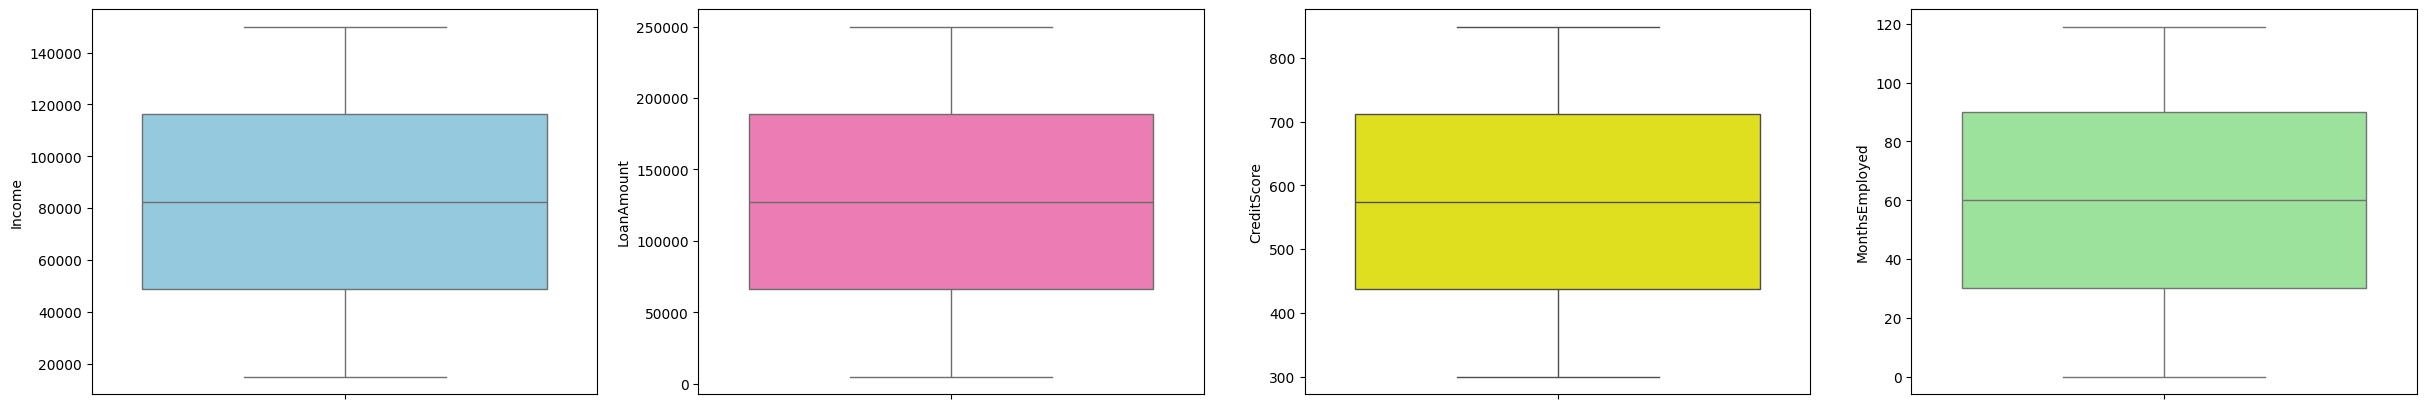

In [30]:
plt.subplots(1,4,figsize=(30,5))
plt.subplot(141)
sns.boxplot(df['Income'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['LoanAmount'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['CreditScore'],color='yellow')
plt.subplot(144)
sns.boxplot(df['MonthsEmployed'],color='lightgreen')
plt.show()

#### Insights
1. The dataset has 255,347 data points and 16 features.
2. Number of credit lines are spread evenly and don't matter much -> Resources spent on collecting this data is not worth it
3. Having a co-signer, being married and having full time job makes you less likely to default, although not by much -> Not having one of these should not make someone unworthy of loan but not have nay of these should reject applicant
4. Having Mortgage makes you more likely to default -> Asks applicants to pay off their mortgage first
5. Their is no correlation b/w Debt to Income Ratio and Credit Score
6. Distribution of Credit score is almost uniform.
7. People who take loan for Purchasing house or business and end up default generally tend to have more income -> Higher income people tend to take for riskier loans
8. Their are almost no Outliers in this Dataset which might not be the case in other similar datasets.
9. Marital Status does not significantly affect Education level.
10. People with 12 months Loan term with high interest rate (above 20%) are highly likely to default -> Company should decrease short term Interest Rates